In [1]:
%bash
echo 'Y' | apt-get install python-mpltoolkits.basemap

Reading package lists...
Building dependency tree...
Reading state information...
python-mpltoolkits.basemap is already the newest version.
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.


In [2]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import datalab.bigquery as bq
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np
import shutil

In [3]:
%sql --module wxquery -d legacy
SELECT
  date,
  MAX(prcp) AS prcp,
  MAX(tmin) AS tmin,
  MAX(tmax) AS tmax,
  MAX(snwd) AS snwd
FROM (
  SELECT
    date,
    IF (element = 'PRCP', value/10, NULL) AS prcp,
    IF (element = 'TMIN', value/10, NULL) AS tmin,
    IF (element = 'TMAX', value/10, NULL) AS tmax,
    IF (element = 'SNWD', value/10, NULL) AS snwd
  FROM
    TABLE_QUERY([bigquery-public-data:ghcn_d],
               'REGEXP_MATCH(table_id, r"^ghcnd_[\d]{4}")')
  WHERE
    id = 'USC00045983'
    AND qflag IS NULL )
GROUP BY
  date
ORDER BY
  date

In [4]:
wx = bq.Query(wxquery).to_dataframe()
wx[:5]

,date,prcp,tmin,tmax,snwd
0,1948-04-15,20.1,1.7,9.4,0.0
1,1948-04-16,8.4,5.6,12.8,0.0
2,1948-04-17,0.3,1.1,11.7,0.0
3,1948-04-18,0.0,-1.7,17.2,0.0
4,1948-04-19,0.0,-1.1,20.6,0.0


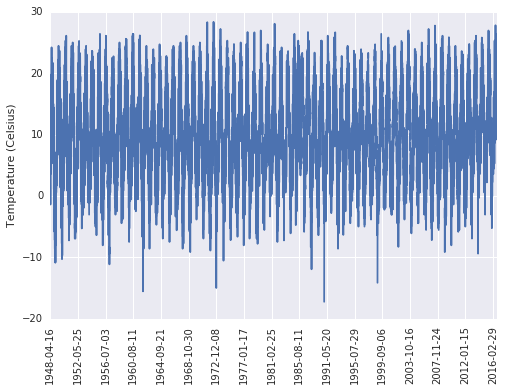

In [5]:
# Plot average temp
ax = (0.5*(wx['tmin']+wx['tmax'])).plot()
x = np.arange(len(wx.date))
palette = sns.color_palette()
ax.set_ylabel("Temperature (Celsius)")
import matplotlib.ticker as plticker
junk = plt.xticks(x[1::1500], wx['date'].values[1::1500], rotation='vertical')

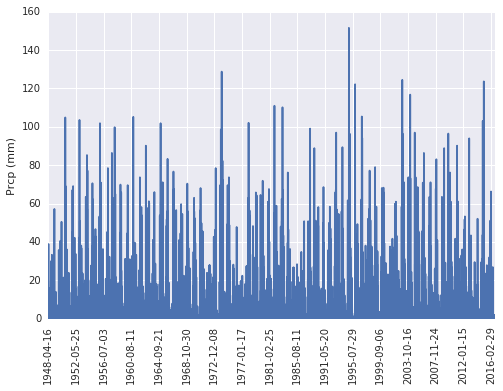

In [6]:
# Plot prcp
ax = wx['prcp'].plot()
x = np.arange(len(wx.date))
palette = sns.color_palette()
ax.set_ylabel("Prcp (mm)")
import matplotlib.ticker as plticker
junk = plt.xticks(x[1::1500], wx['date'].values[1::1500], rotation='vertical')

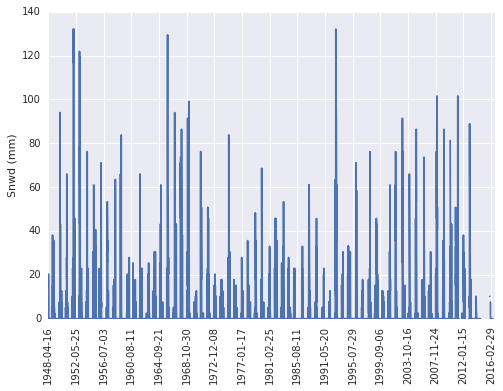

In [7]:
# Plot snwd
ax = wx['snwd'].plot()
x = np.arange(len(wx.date))
palette = sns.color_palette()
ax.set_ylabel("Snwd (mm)")
import matplotlib.ticker as plticker
junk = plt.xticks(x[1::1500], wx['date'].values[1::1500], rotation='vertical')